In [4]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [2]:
!pip install python_speech_features
import numpy as np  # Numerical computations
import pandas as pd  # For handling metadata if needed
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # For better visualizations
import librosa  # Audio processing
import librosa.display  # Visualization of audio features
import scipy.signal  # Signal processing (filtering, denoising)
import soundfile as sf  # Read/write audio files
# Install noisereduce before importing it
!pip install noisereduce
import noisereduce as nr  # Noise reduction
from sklearn.preprocessing import StandardScaler 
from python_speech_features import mfcc  # Extract MFCC features
import tensorflow as tf  # For deep learning model

# Data Loading

In [3]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Update with the correct dataset path
dataset_path = r"donateacry_corpus"  # Change to actual path

# Lists to store data
audio_data = []
labels = []
label_mapping = {}

# Recursively load audio files
for root, dirs, files in os.walk(dataset_path, topdown=True):
    for file in files:
        if file.lower().endswith(".wav"):  # Case-insensitive check
            file_path = os.path.join(root, file)

            # Debugging prints
            print(f"Found audio file: {file_path}")

            # Load audio
            y, sr = librosa.load(file_path, sr=16000)
            audio_data.append((file_path, y, sr))

            # Extract label from folder name
            label = os.path.basename(root)
            if label not in label_mapping:
                label_mapping[label] = len(label_mapping)
            labels.append(label_mapping[label])

           
# Print dataset info
print(f"\n Total audio files loaded: {len(audio_data)}")
print(f"Labels found: {label_mapping}")

# Check if audio_data is empty before printing a sample
if audio_data:
    print(f" Sample file: {audio_data[0][0]}, Label: {labels[0]}")
else:
    print(" No .wav files found in the dataset path.")

Found audio file: donateacry_corpus\belly_pain\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav


C:\Users\mypc\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138524-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138536-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138545-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138591-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138647-1.0-m-72-bp.wav
Found audio file: donateacry_corpus\belly_pain\69BDA5D6-0276-4462-9BF7-951799563728-1436936185-1.1-m-26-bp.wav
F

Found audio file: donateacry_corpus\hungry\2e25d0a5-0b2b-44ef-8491-e445b16ea75c-1430056332640-1.7-f-26-hu.wav
Found audio file: donateacry_corpus\hungry\2EE636FB-BD76-4118-A0EF-82FAFC32301F-1436586600-1.1-f-04-hu.wav
Found audio file: donateacry_corpus\hungry\2F1C0515-EC8E-44C1-ABEA-E04EB475543A-1432143888-1.1-m-22-hu.wav
Found audio file: donateacry_corpus\hungry\3030d0e9-0c9b-4616-9b83-f10dc2dedbfd-1430053447333-1.7-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\3030d0e9-0c9b-4616-9b83-f10dc2dedbfd-1430053456045-1.7-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\3030d0e9-0c9b-4616-9b83-f10dc2dedbfd-1430053464739-1.7-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\3030d0e9-0c9b-4616-9b83-f10dc2dedbfd-1430053594259-1.7-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\3030d0e9-0c9b-4616-9b83-f10dc2dedbfd-1430326171876-1.7-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\30c2cee4-b682-4dcb-86b9-7fa6f36f1b66-1430728411287-1.7-f-72-hu.wav
Found audio file

Found audio file: donateacry_corpus\hungry\743E7CCA-D32B-40B6-9541-9808122D3F6B-1436860011-1.1-f-26-hu.wav
Found audio file: donateacry_corpus\hungry\743E7CCA-D32B-40B6-9541-9808122D3F6B-1436860028-1.1-f-26-hu.wav
Found audio file: donateacry_corpus\hungry\743E7CCA-D32B-40B6-9541-9808122D3F6B-1436860053-1.1-f-26-hu.wav
Found audio file: donateacry_corpus\hungry\743E7CCA-D32B-40B6-9541-9808122D3F6B-1436860161-1.1-f-26-hu.wav
Found audio file: donateacry_corpus\hungry\7616E8F4-B1A7-45A6-9A0C-C9BB2DE64FC3-1436868751-1.1-m-72-hu.wav
Found audio file: donateacry_corpus\hungry\771fa0cc-4535-471b-9cec-d26deff8d567-1429803644891-1.7-m-04-hu.wav
Found audio file: donateacry_corpus\hungry\789d2553-cbf2-4911-91e4-fb228d231238-1430818517787-1.7-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\7A22229D-06C2-4AAA-9674-DE5DF1906B3A-1436891933-1.1-m-72-hu.wav
Found audio file: donateacry_corpus\hungry\7A864194-4B6B-4850-ABBF-0C2A8170107B-1436846797-1.1-f-26-hu.wav
Found audio file: donateacry_co

Found audio file: donateacry_corpus\hungry\aaa57dbd-7b88-454a-963e-6faa2f4ed4e7-1436982075169-1.7-f-04-hu.wav
Found audio file: donateacry_corpus\hungry\aaa57dbd-7b88-454a-963e-6faa2f4ed4e7-1436982098411-1.7-f-04-hu.wav
Found audio file: donateacry_corpus\hungry\aaa57dbd-7b88-454a-963e-6faa2f4ed4e7-1436988612387-1.7-f-04-hu.wav
Found audio file: donateacry_corpus\hungry\aaa57dbd-7b88-454a-963e-6faa2f4ed4e7-1437166513710-1.7-f-04-hu.wav
Found audio file: donateacry_corpus\hungry\ad7fd28b-3e85-4e9b-9e18-af4bda64c60f-1430756389867-1.7-m-72-hu.wav
Found audio file: donateacry_corpus\hungry\adb53808-8b13-4c08-b055-6653c75298be-1430133962749-1.7-m-72-hu.wav
Found audio file: donateacry_corpus\hungry\adb53808-8b13-4c08-b055-6653c75298be-1430133982281-1.7-m-72-hu.wav
Found audio file: donateacry_corpus\hungry\adcefe56-90b1-4120-83b1-93008cb6f7f0-1430731683554-1.7-m-04-hu.wav
Found audio file: donateacry_corpus\hungry\AE02C934-F4E5-4C73-818D-56AA6887EC18-1430279441-1.0-m-26-hu.wav
Found audio f

Found audio file: donateacry_corpus\hungry\F2F97740-D638-4B6F-9E09-3AC65F06B448-1436849335-1.1-f-48-hu.wav
Found audio file: donateacry_corpus\hungry\F3BAEDDA-CDC0-4A65-90EE-5C372CEE4F3B-1437012044-1.1-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\F3BAEDDA-CDC0-4A65-90EE-5C372CEE4F3B-1437012059-1.1-m-26-hu.wav
Found audio file: donateacry_corpus\hungry\F3BAEDDA-CDC0-4A65-90EE-5C372CEE4F3B-1437012076-1.1-f-26-hu.wav
Found audio file: donateacry_corpus\hungry\F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318390-1.0-m-04-hu.wav
Found audio file: donateacry_corpus\hungry\F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318400-1.0-m-04-hu.wav
Found audio file: donateacry_corpus\hungry\F4A0C710-AC2D-42E0-8EA9-3E4CAC31EE20-1430318416-1.0-m-04-hu.wav
Found audio file: donateacry_corpus\hungry\F4A65A98-ADEE-49C4-9B45-65A8429DF170-1430232330-1.0-m-72-hu.wav
Found audio file: donateacry_corpus\hungry\f5b29377-7cd6-4688-942c-5a07add39dc5-1437178455960-1.7-f-26-hu.wav
Found audio file: donateacry_corpu

In [4]:
from collections import Counter

# Invert the label_mapping to get class names back
inverse_label_mapping = {v: k for k, v in label_mapping.items()}

# Count how many times each label index appears
label_counts = Counter(labels)

# Print counts per class
print("\n🔊 Audio file count per class:")
for label_idx, count in label_counts.items():
    class_name = inverse_label_mapping[label_idx]
    print(f" - {class_name}: {count} files")

# Print total number of files
print(f"\n📊 Total audio files: {len(audio_data)}")


🔊 Audio file count per class:
 - belly_pain: 16 files
 - burping: 8 files
 - discomfort: 27 files
 - hungry: 382 files
 - tired: 24 files

📊 Total audio files: 457


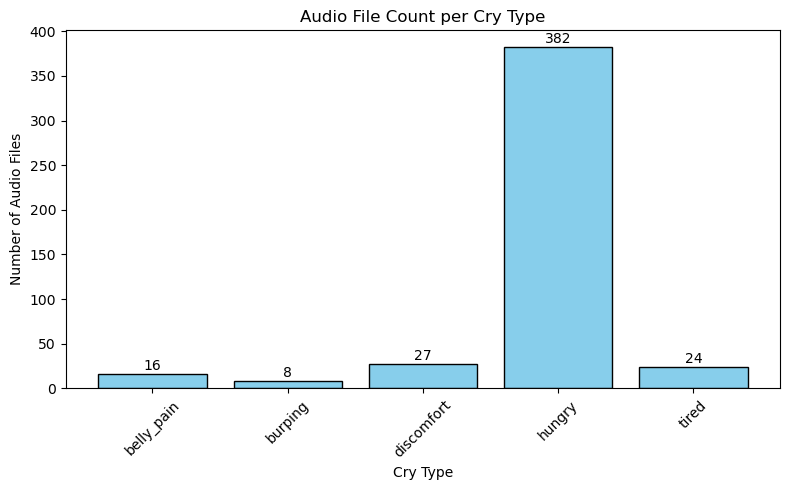

In [5]:
import matplotlib.pyplot as plt

# Bar plot of class distribution
classes = [inverse_label_mapping[label_idx] for label_idx in label_counts.keys()]
counts = list(label_counts.values())

plt.figure(figsize=(8, 5))
bars = plt.bar(classes, counts, color='skyblue', edgecolor='black')
plt.title("Audio File Count per Cry Type")
plt.xlabel("Cry Type")
plt.ylabel("Number of Audio Files")
plt.xticks(rotation=45)
plt.tight_layout()

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 1, int(yval), ha='center', va='bottom')

plt.show()

## Pre-process The Audio Files

In [5]:
import os
import librosa
import soundfile as sf
import noisereduce as nr

# Set paths
ORIGINAL_DATASET_DIR = 'donateacry_corpus'  # your current dataset
PREPROCESSED_DIR = 'preprocess'
SAMPLE_RATE = 16000

# Create output folder if not exists
os.makedirs(PREPROCESSED_DIR, exist_ok=True)

# Walk through dataset
for class_name in os.listdir(ORIGINAL_DATASET_DIR):
    class_path = os.path.join(ORIGINAL_DATASET_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    output_class_dir = os.path.join(PREPROCESSED_DIR, class_name)
    os.makedirs(output_class_dir, exist_ok=True)

    for file in os.listdir(class_path):
        if not file.lower().endswith('.wav'):
            continue

        file_path = os.path.join(class_path, file)
        print(f"🎧 Processing: {file_path}")

        # Load audio
        y, sr = librosa.load(file_path, sr=SAMPLE_RATE)

        # Step 1: Noise reduction
        print("   🔹 Noise Reduction")
        y_denoised = nr.reduce_noise(y=y, sr=sr)

        # Step 2: Silence removal
        print("   🔹 Silence Removal")
        y_trimmed, _ = librosa.effects.trim(y_denoised, top_db=20)

        # Step 3: Volume normalization
        print("   🔹 Volume Normalization")
        y_normalized = y_trimmed / max(abs(y_trimmed)) if np.max(np.abs(y_trimmed)) > 0 else y_trimmed

        # Save processed audio
        output_file_path = os.path.join(output_class_dir, file)
        sf.write(output_file_path, y_normalized, sr)
        print(f"   ✅ Saved to: {output_file_path}\n")


🎧 Processing: donateacry_corpus\belly_pain\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\belly_pain\549a46d8-9c84-430e-ade8-97eae2bef787-1430130772174-1.7-m-48-bp.wav

🎧 Processing: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138495-1.0-m-72-bp.wav

🎧 Processing: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138506-1.0-m-72-bp.wav

🎧 Processing: donateacry_corpus\belly_pain\643D64AD-B711-469A-AF69-55C0D5D3E30F-1430138514-1.0-m-72-bp.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume No

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\discomfort\1309B82C-F146-46F0-A723-45345AFA6EA8-1432801703-1.1-f-26-dc.wav

🎧 Processing: donateacry_corpus\discomfort\2294E2B2-8E36-4DA6-A898-B947CB9446AB-1436462707-1.1-m-26-dc.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\discomfort\2294E2B2-8E36-4DA6-A898-B947CB9446AB-1436462707-1.1-m-26-dc.wav

🎧 Processing: donateacry_corpus\discomfort\64acb345-a61e-4ef3-a5a6-cf83c04b83f1-1430058990597-1.7-m-72-dc.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\discomfort\64acb345-a61e-4ef3-a5a6-cf83c04b83f1-1430058990597-1.7-m-72-dc.wav

🎧 Processing: donateacry_corpus\discomfort\64acb345-a61e-4ef3-a5a6-cf83c04b83f1-1430059012473-1.7-m-72-dc.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\discomfort\64acb345-a61e-4ef3-a5a6-cf83c04b83f1-1430059012473-1.7-m-72-dc.wav

🎧 Proces

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\08E9485B-2772-444B-A636-77E14DD14A8C-1431493453-1.0-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\090C15A8-5406-4EA5-97A3-81F6527227C0-1430147515-1.0-m-72-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\090C15A8-5406-4EA5-97A3-81F6527227C0-1430147515-1.0-m-72-hu.wav

🎧 Processing: donateacry_corpus\hungry\090C15A8-5406-4EA5-97A3-81F6527227C0-1430147525-1.0-m-72-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\090C15A8-5406-4EA5-97A3-81F6527227C0-1430147525-1.0-m-72-hu.wav

🎧 Processing: donateacry_corpus\hungry\090C15A8-5406-4EA5-97A3-81F6527227C0-1430147533-1.0-m-72-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\090C15A8-5406-4EA5-97A3-81F6527227C0-1430147533-1.0-m-72-hu.wav

🎧 Processing: donateacry_corpus\hungry\090C15A8-

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\1f40790f-68f2-4e7e-845e-715bd97c82d0-1429979568422-1.7-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\1f40790f-68f2-4e7e-845e-715bd97c82d0-1429979603276-1.7-m-72-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\1f40790f-68f2-4e7e-845e-715bd97c82d0-1429979603276-1.7-m-72-hu.wav

🎧 Processing: donateacry_corpus\hungry\20E2B5A0-40A4-4FD8-8935-AFD1DB833510-1430127670-1.0-m-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\20E2B5A0-40A4-4FD8-8935-AFD1DB833510-1430127670-1.0-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\218e6fd7-f9c5-4490-afd7-c4fba174e7d2-1430209174300-1.7-m-72-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\218e6fd7-f9c5-4490-afd7-c4fba174e7d2-1430209174300-1.7-m-72-hu.wav

🎧 Processing: donateacry_corpus\h

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\31e785de-b0c9-464f-88e2-bd8f1dd5cda4-1433403682898-1.7-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\323cab80-2551-4a46-8c3d-62c7a5264afa-1430382588301-1.7-m-22-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\323cab80-2551-4a46-8c3d-62c7a5264afa-1430382588301-1.7-m-22-hu.wav

🎧 Processing: donateacry_corpus\hungry\35D58153-7AB7-443D-BED0-2D7ABF73743F-1431855847-1.1-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\35D58153-7AB7-443D-BED0-2D7ABF73743F-1431855847-1.1-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\36f1b3ec-3d2a-470e-af6f-0a8cc11b2723-1430237012976-1.7-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\36f1b3ec-3d2a-470e-af6f-0a8cc11b2723-1430237012976-1.7-m-04-hu.wav

🎧 Processing: donateacry_corpus\h

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\40a4c760-facf-4911-b0a6-22eccc3ab18d-1430477726097-1.7-f-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\40a4c760-facf-4911-b0a6-22eccc3ab18d-1430477756469-1.7-f-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\40a4c760-facf-4911-b0a6-22eccc3ab18d-1430477756469-1.7-f-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\40a4c760-facf-4911-b0a6-22eccc3ab18d-1430477780076-1.7-f-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\40a4c760-facf-4911-b0a6-22eccc3ab18d-1430477780076-1.7-f-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\415d69b4-6d84-4bf8-97b0-10f8f108dc1d-1430739498797-1.7-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\415d69b4-6d84-4bf8-97b0-10f8f108dc1d-1430739498797-1.7-m-04-hu.wav

🎧 Processing: donateacry_co

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\5728DDD6-149B-412F-A14B-C29B9B5E415F-1432635035-1.0-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\5728DDD6-149B-412F-A14B-C29B9B5E415F-1432635047-1.0-m-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\5728DDD6-149B-412F-A14B-C29B9B5E415F-1432635047-1.0-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\5728DDD6-149B-412F-A14B-C29B9B5E415F-1432635069-1.0-m-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\5728DDD6-149B-412F-A14B-C29B9B5E415F-1432635069-1.0-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757081034-1.7-m-48-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\5afc6a14-a9d8-45f8-b31d-c79dd87cc8c6-1430757081034-1.7-m-48-hu.wav

🎧 Processing: donateacry_corpus\hungry\5b4

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\719bb382-a592-46b7-82d2-8b4a625263b7-1430376267895-1.7-m-48-hu.wav

🎧 Processing: donateacry_corpus\hungry\719bb382-a592-46b7-82d2-8b4a625263b7-1430376483385-1.7-m-48-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\719bb382-a592-46b7-82d2-8b4a625263b7-1430376483385-1.7-m-48-hu.wav

🎧 Processing: donateacry_corpus\hungry\719bb382-a592-46b7-82d2-8b4a625263b7-1430376501744-1.7-m-48-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\719bb382-a592-46b7-82d2-8b4a625263b7-1430376501744-1.7-m-48-hu.wav

🎧 Processing: donateacry_corpus\hungry\719bb382-a592-46b7-82d2-8b4a625263b7-1430376562788-1.7-m-48-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\719bb382-a592-46b7-82d2-8b4a625263b7-1430376562788-1.7-m-48-hu.wav

🎧 Processing: donateacry_co

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\80130d3a-ceb9-4460-8464-e956bac5c40d-1436850034856-1.7-m-72-hu.wav

🎧 Processing: donateacry_corpus\hungry\8057932d-a6af-4d63-903b-37049686e176-1430919675907-1.7-f-72-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\8057932d-a6af-4d63-903b-37049686e176-1430919675907-1.7-f-72-hu.wav

🎧 Processing: donateacry_corpus\hungry\80f5ab0a-16c1-4738-9209-fbdae52ff769-1430140636917-1.7-f-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\80f5ab0a-16c1-4738-9209-fbdae52ff769-1430140636917-1.7-f-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\815af07e-4c31-4032-8bd1-dab6e60c879e-1433156413683-1.7-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\815af07e-4c31-4032-8bd1-dab6e60c879e-1433156413683-1.7-m-04-hu.wav

🎧 Processing: donateacry_co

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\8FDA58A7-FDC6-4421-855F-738E6E853E43-1429895742-1.0-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\8FDA58A7-FDC6-4421-855F-738E6E853E43-1429895751-1.0-m-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\8FDA58A7-FDC6-4421-855F-738E6E853E43-1429895751-1.0-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\8FDA58A7-FDC6-4421-855F-738E6E853E43-1429895780-1.0-m-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\8FDA58A7-FDC6-4421-855F-738E6E853E43-1429895780-1.0-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\9090c7a3-bebc-4485-aafc-64e4298da3ac-1430088396663-1.7-f-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\9090c7a3-bebc-4485-aafc-64e4298da3ac-1430088396663-1.7-f-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\909

   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\a40b9b8d-e4bc-457a-badf-f38bdbc0c358-1430016779981-1.7-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\a40b9b8d-e4bc-457a-badf-f38bdbc0c358-1430017191818-1.7-m-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\a40b9b8d-e4bc-457a-badf-f38bdbc0c358-1430017191818-1.7-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\a56e2494-d2b2-480e-af0b-de9ea8f33572-1436897427825-1.7-f-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\a56e2494-d2b2-480e-af0b-de9ea8f33572-1436897427825-1.7-f-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\a7b13b65-da2c-48ec-8aed-46adcaba705f-1430823489236-1.7-f-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\a7b13b65-da2c-48ec-8aed-46adcaba705f-1430823489236-1.7-f-26-hu.wav

🎧 Proc

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\b4c460d8-bd6b-4017-9bb8-2ae4ff0c5af1-1432751065608-1.7-f-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\b5044f9a-6f2e-44fc-8e04-9076a988acf2-1435544527174-1.7-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\b5044f9a-6f2e-44fc-8e04-9076a988acf2-1435544527174-1.7-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\b8fe4527-5e46-437f-897d-be32112bc1c8-1430166086647-1.7-f-48-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\b8fe4527-5e46-437f-897d-be32112bc1c8-1430166086647-1.7-f-48-hu.wav

🎧 Processing: donateacry_corpus\hungry\b9d0daab-43c8-41f1-86af-3bcdea9af63c-1429979961789-1.7-f-22-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\b9d0daab-43c8-41f1-86af-3bcdea9af63c-1429979961789-1.7-f-22-hu.wav

🎧 Processing: donateacry_co

   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\D1CB71F9-EF76-49B3-A703-41D557444D21-1436863375-1.1-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\d1e236a0-e030-4137-9030-5625026cd098-1430477951092-1.2-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\d1e236a0-e030-4137-9030-5625026cd098-1430477951092-1.2-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\d1e236a0-e030-4137-9030-5625026cd098-1430477960643-1.2-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\d1e236a0-e030-4137-9030-5625026cd098-1430477960643-1.2-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\D54D9C2A-56ED-4338-9D1F-2ADB4E081DAD-1429807587-1.0-m-48-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\D54D9C2A-56ED-4338-9D1F-2ADB4E081DAD-1429807587-1.0-m-48-hu.wav

🎧 Processing: d

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\EC2E1160-BC33-450A-A62D-DE2A4C0D42BB-1430039051-1.0-f-48-hu.wav

🎧 Processing: donateacry_corpus\hungry\eccb4617-8373-4c4f-b49e-bb2d72bce8d8-1430035348191-1.7-m-26-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\eccb4617-8373-4c4f-b49e-bb2d72bce8d8-1430035348191-1.7-m-26-hu.wav

🎧 Processing: donateacry_corpus\hungry\ed31b187-34af-4ff1-979c-3b8a5905fb7b-1430044808480-1.7-m-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\ed31b187-34af-4ff1-979c-3b8a5905fb7b-1430044808480-1.7-m-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\ed31b187-34af-4ff1-979c-3b8a5905fb7b-1430044853892-1.7-f-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\ed31b187-34af-4ff1-979c-3b8a5905fb7b-1430044853892-1.7-f-04-hu.wav

🎧 Processing: donateacry_corpu

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\fa8620d3-e7db-4101-aff0-28dbf0d96a5f-1434296505682-1.7-f-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\fa8620d3-e7db-4101-aff0-28dbf0d96a5f-1434465485354-1.7-f-04-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\fa8620d3-e7db-4101-aff0-28dbf0d96a5f-1434465485354-1.7-f-04-hu.wav

🎧 Processing: donateacry_corpus\hungry\FAE74A94-9968-43ED-958C-50D7C4C1F13C-1430770858-1.0-f-22-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\FAE74A94-9968-43ED-958C-50D7C4C1F13C-1430770858-1.0-f-22-hu.wav

🎧 Processing: donateacry_corpus\hungry\FAE74A94-9968-43ED-958C-50D7C4C1F13C-1430770871-1.0-f-22-hu.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\hungry\FAE74A94-9968-43ED-958C-50D7C4C1F13C-1430770871-1.0-f-22-hu.wav

🎧 Processing: donateacry_corpus\hungry\

   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\tired\d6cda191-4962-4308-9a36-46d5648a95ed-1431616581736-1.7-m-04-ti.wav

🎧 Processing: donateacry_corpus\tired\eea17285-4ab9-4d34-a2f5-55fc8c866ac6-1431887695278-1.7-f-26-ti.wav
   🔹 Noise Reduction
   🔹 Silence Removal
   🔹 Volume Normalization
   ✅ Saved to: preprocess\tired\eea17285-4ab9-4d34-a2f5-55fc8c866ac6-1431887695278-1.7-f-26-ti.wav



In [6]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a4/7d/f1c30a92854540bf789e9cd5dde7ef49bbe63f855b85a2e6b3db8135c591/opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/39.5 MB 812.7 kB/s eta 0:00:49
   ---------------------------------------- 0.1/39.5 MB 558.5 kB/s eta 0:01:11
   ---------------------------------------- 0.1/39.5 MB 587.0 kB/s eta 0:01:08
   ---------------------------------------- 0.1/39.5 MB 554.9 kB/s eta 0:01:11
   ---------------------------------------- 0.2/39.5 MB 655.4 kB/s eta 0:01:00
   ---------------------------------------- 0.3/39.5 MB 1.1 MB/s eta 0:00:38
   ---------------------------------------- 0.4/39.5 MB 1.3 MB/s eta 0:00:31
    --------------------------------------- 0.7/39.5 MB 1.7 MB/s eta 0:00:23
    -

# Mel Spectrogram Feature Extraction

In [6]:
import os
import numpy as np
import librosa
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

DATA_DIR = 'preprocess'
SAMPLE_RATE = 16000
N_MELS = 128
MAX_DURATION = 4  # seconds
MAX_LENGTH = SAMPLE_RATE * MAX_DURATION
FIXED_SIZE = (128, 128)  # final shape (height, width)

def extract_mel(file_path, sr=SAMPLE_RATE, n_mels=N_MELS, fixed_size=FIXED_SIZE):
    y, _ = librosa.load(file_path, sr=sr)

    # Pad or truncate
    if len(y) < MAX_LENGTH:
        y = np.pad(y, (0, MAX_LENGTH - len(y)))
    else:
        y = y[:MAX_LENGTH]

    # Generate mel spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
    mel_db = librosa.power_to_db(mel_spec, ref=np.max)

    # Resize to fixed shape (128x128)
    mel_resized = cv2.resize(mel_db, fixed_size)

    return mel_resized

# Load data and extract features
X = []
y = []

for class_name in os.listdir(DATA_DIR):
    class_dir = os.path.join(DATA_DIR, class_name)
    if not os.path.isdir(class_dir):
        continue

    for file in os.listdir(class_dir):
        if not file.lower().endswith('.wav'):
            continue
        file_path = os.path.join(class_dir, file)
        mel = extract_mel(file_path)
        X.append(mel)
        y.append(class_name)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Add channel dimension for CNN: (samples, 128, 128, 1)
X = X[..., np.newaxis]

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)

print(f"✅ Shape of X: {X.shape}, y: {y_onehot.shape}")


✅ Shape of X: (457, 128, 128, 1), y: (457, 5)


In [10]:
X

array([[[[-47.230606],
         [-52.874367],
         [-64.79551 ],
         ...,
         [-79.145485],
         [-57.98644 ],
         [-52.23761 ]],

        [[-47.0956  ],
         [-51.895023],
         [-54.988674],
         ...,
         [-79.14798 ],
         [-58.048035],
         [-52.20459 ]],

        [[-46.940952],
         [-48.290462],
         [-50.768524],
         ...,
         [-79.14717 ],
         [-58.02728 ],
         [-52.18393 ]],

        ...,

        [[-80.      ],
         [-80.      ],
         [-80.      ],
         ...,
         [-79.51749 ],
         [-67.50683 ],
         [-61.638832]],

        [[-80.      ],
         [-80.      ],
         [-80.      ],
         ...,
         [-79.51931 ],
         [-67.55352 ],
         [-61.686913]],

        [[-80.      ],
         [-80.      ],
         [-80.      ],
         ...,
         [-79.5216  ],
         [-67.61205 ],
         [-61.743874]]],


       [[[-59.37804 ],
         [-65.302605],
         [-79.

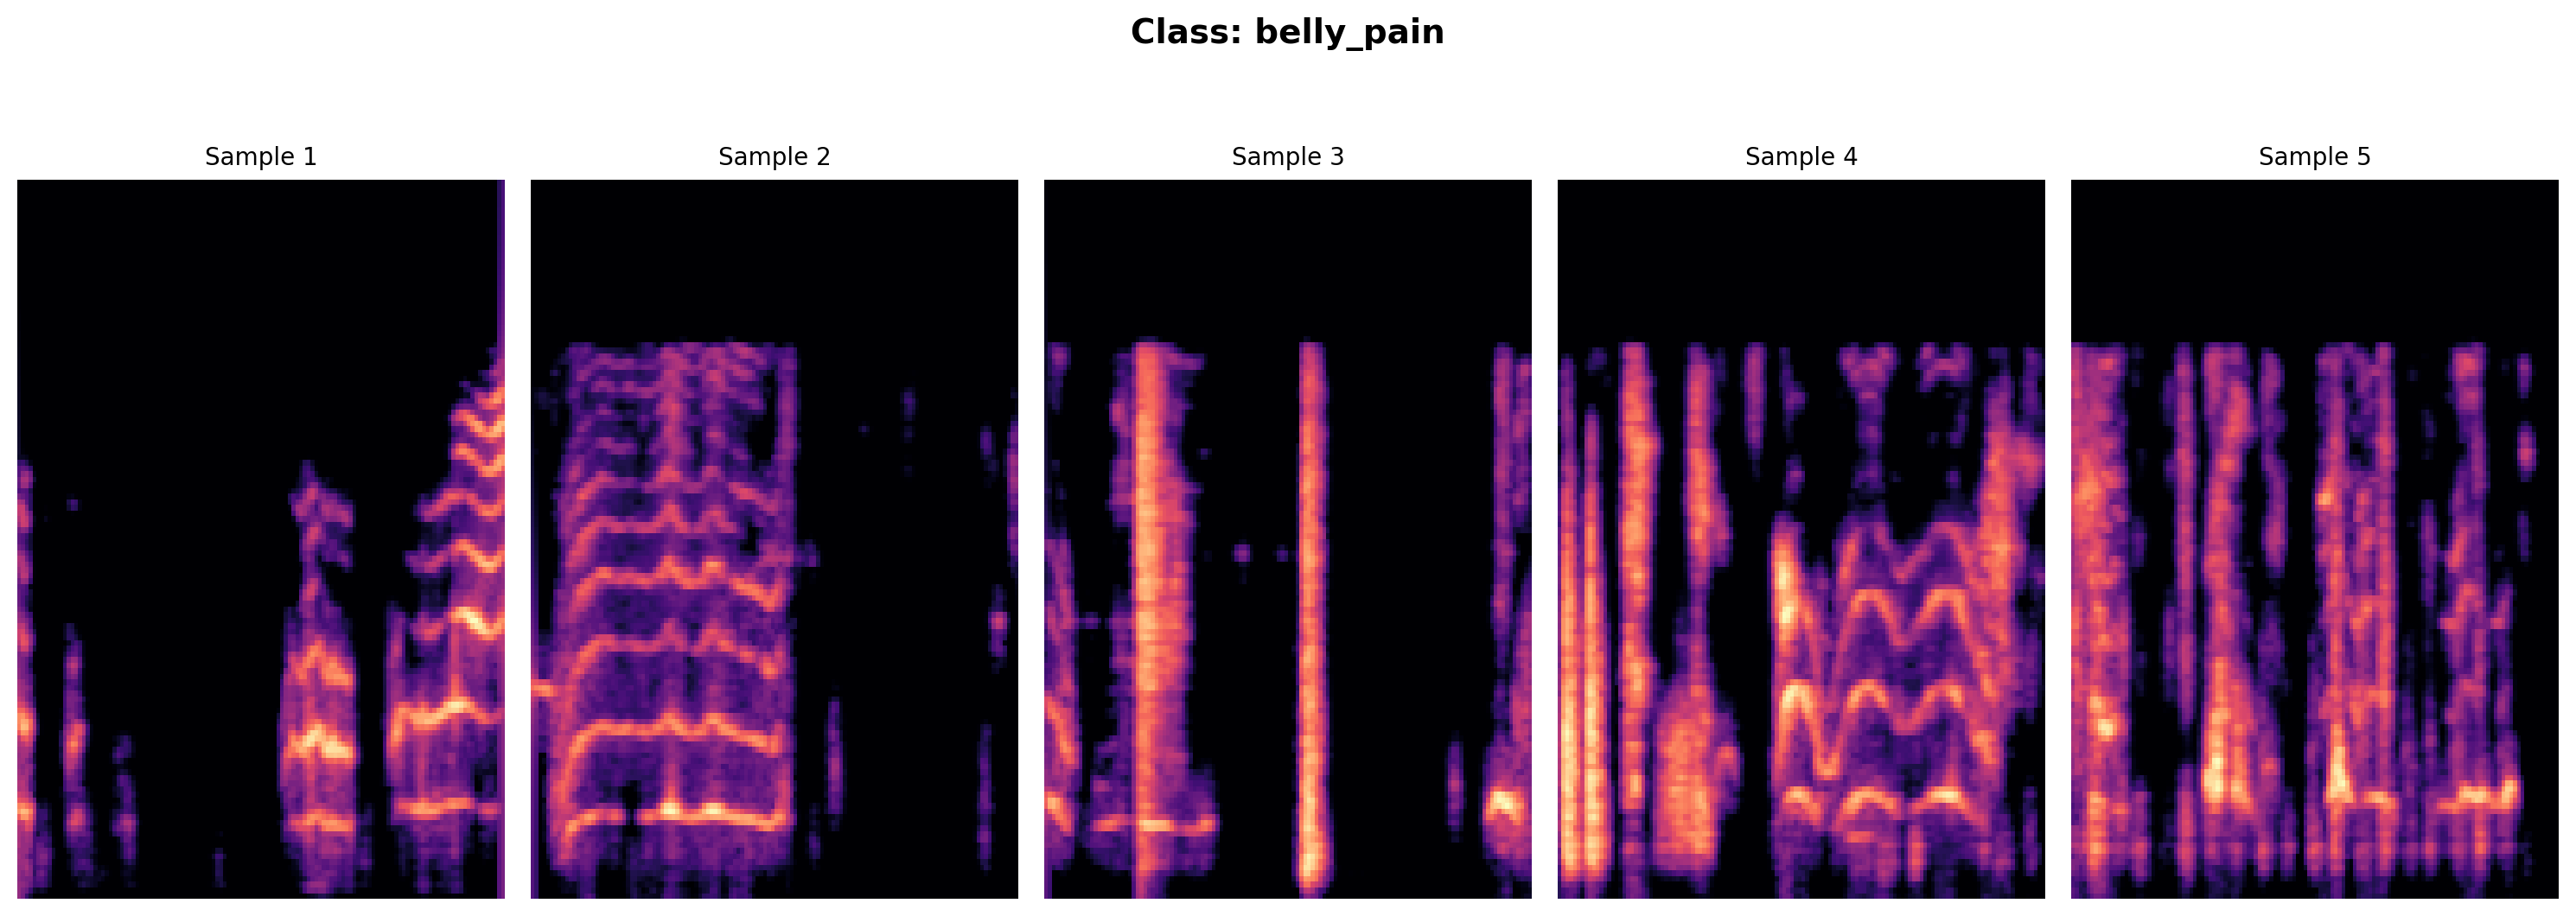

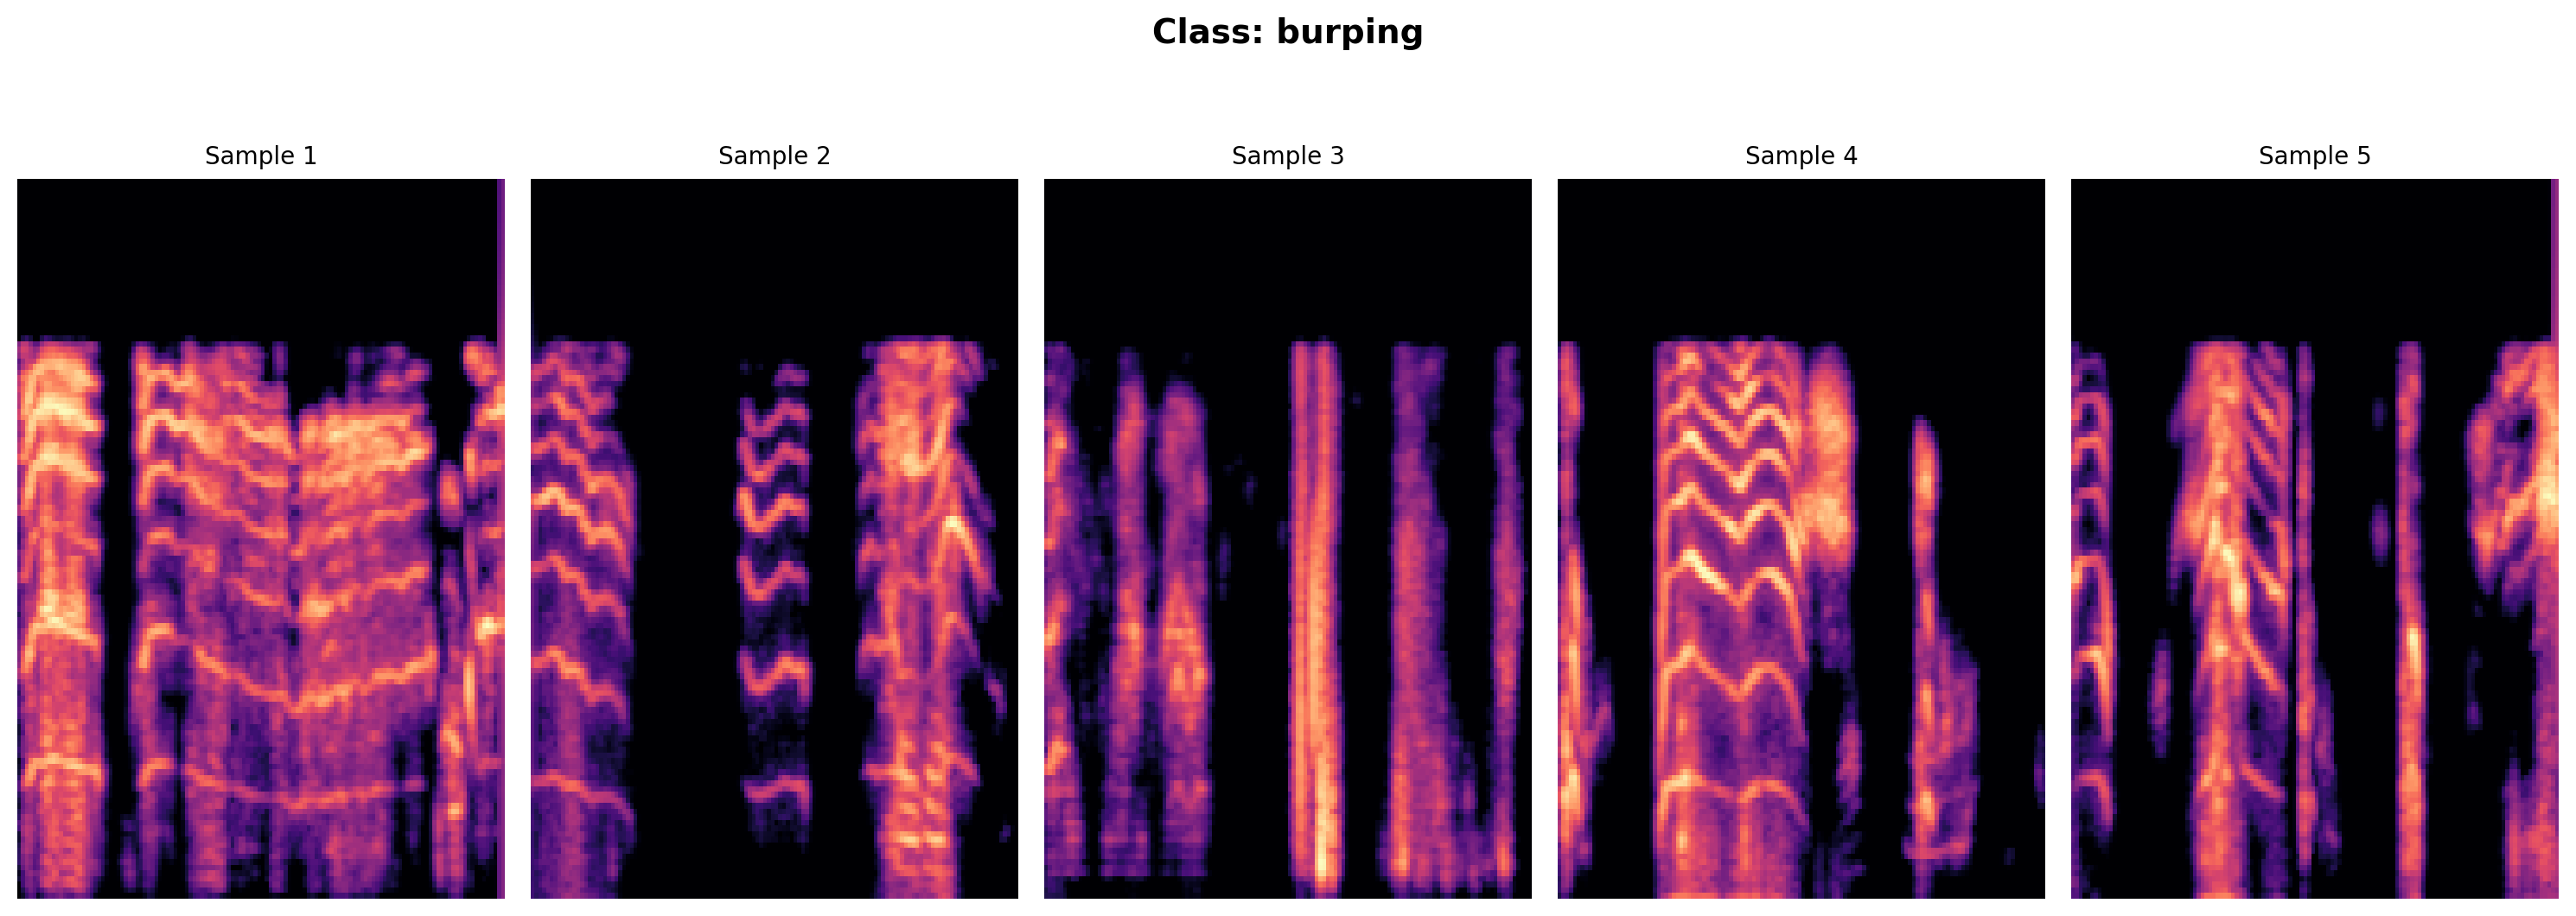

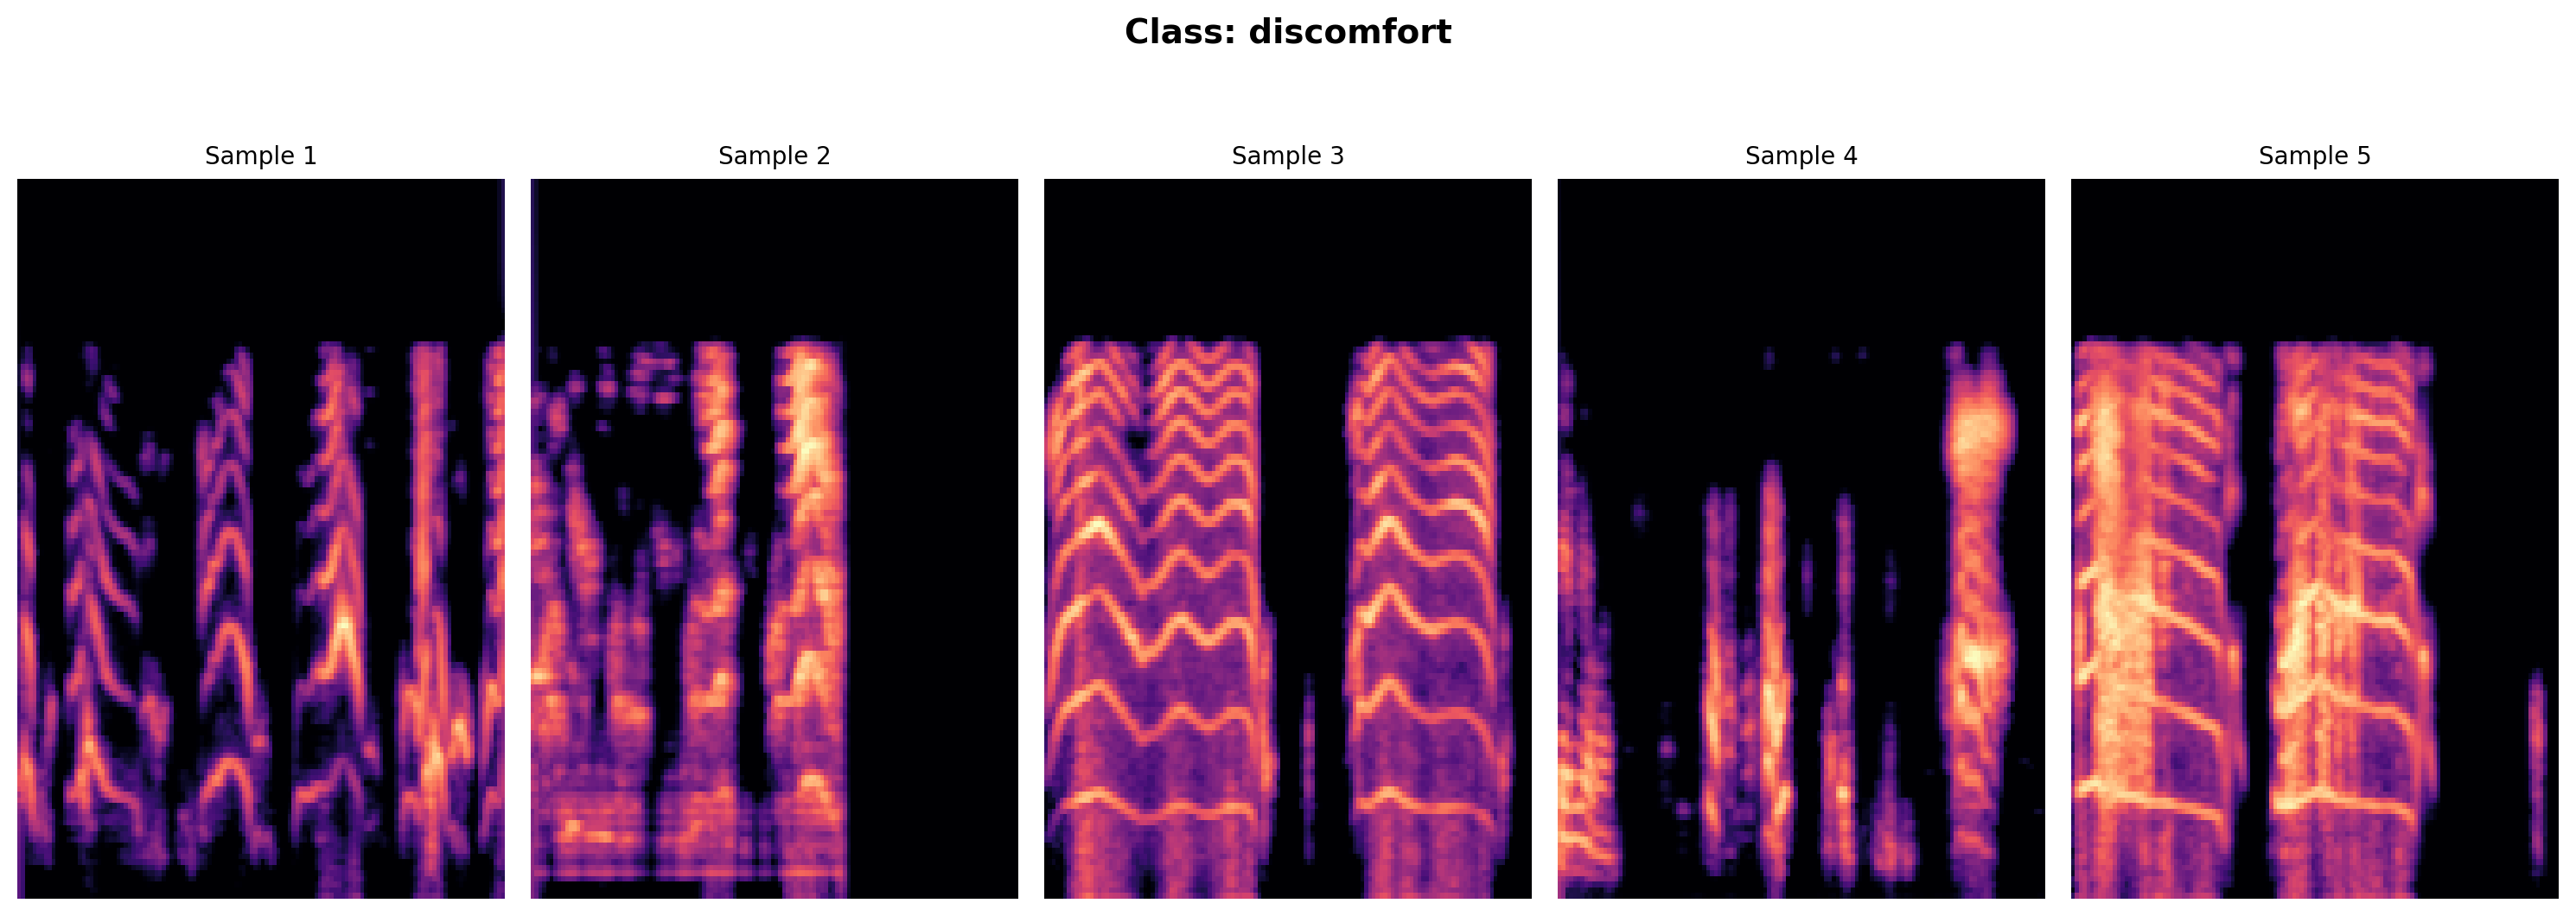

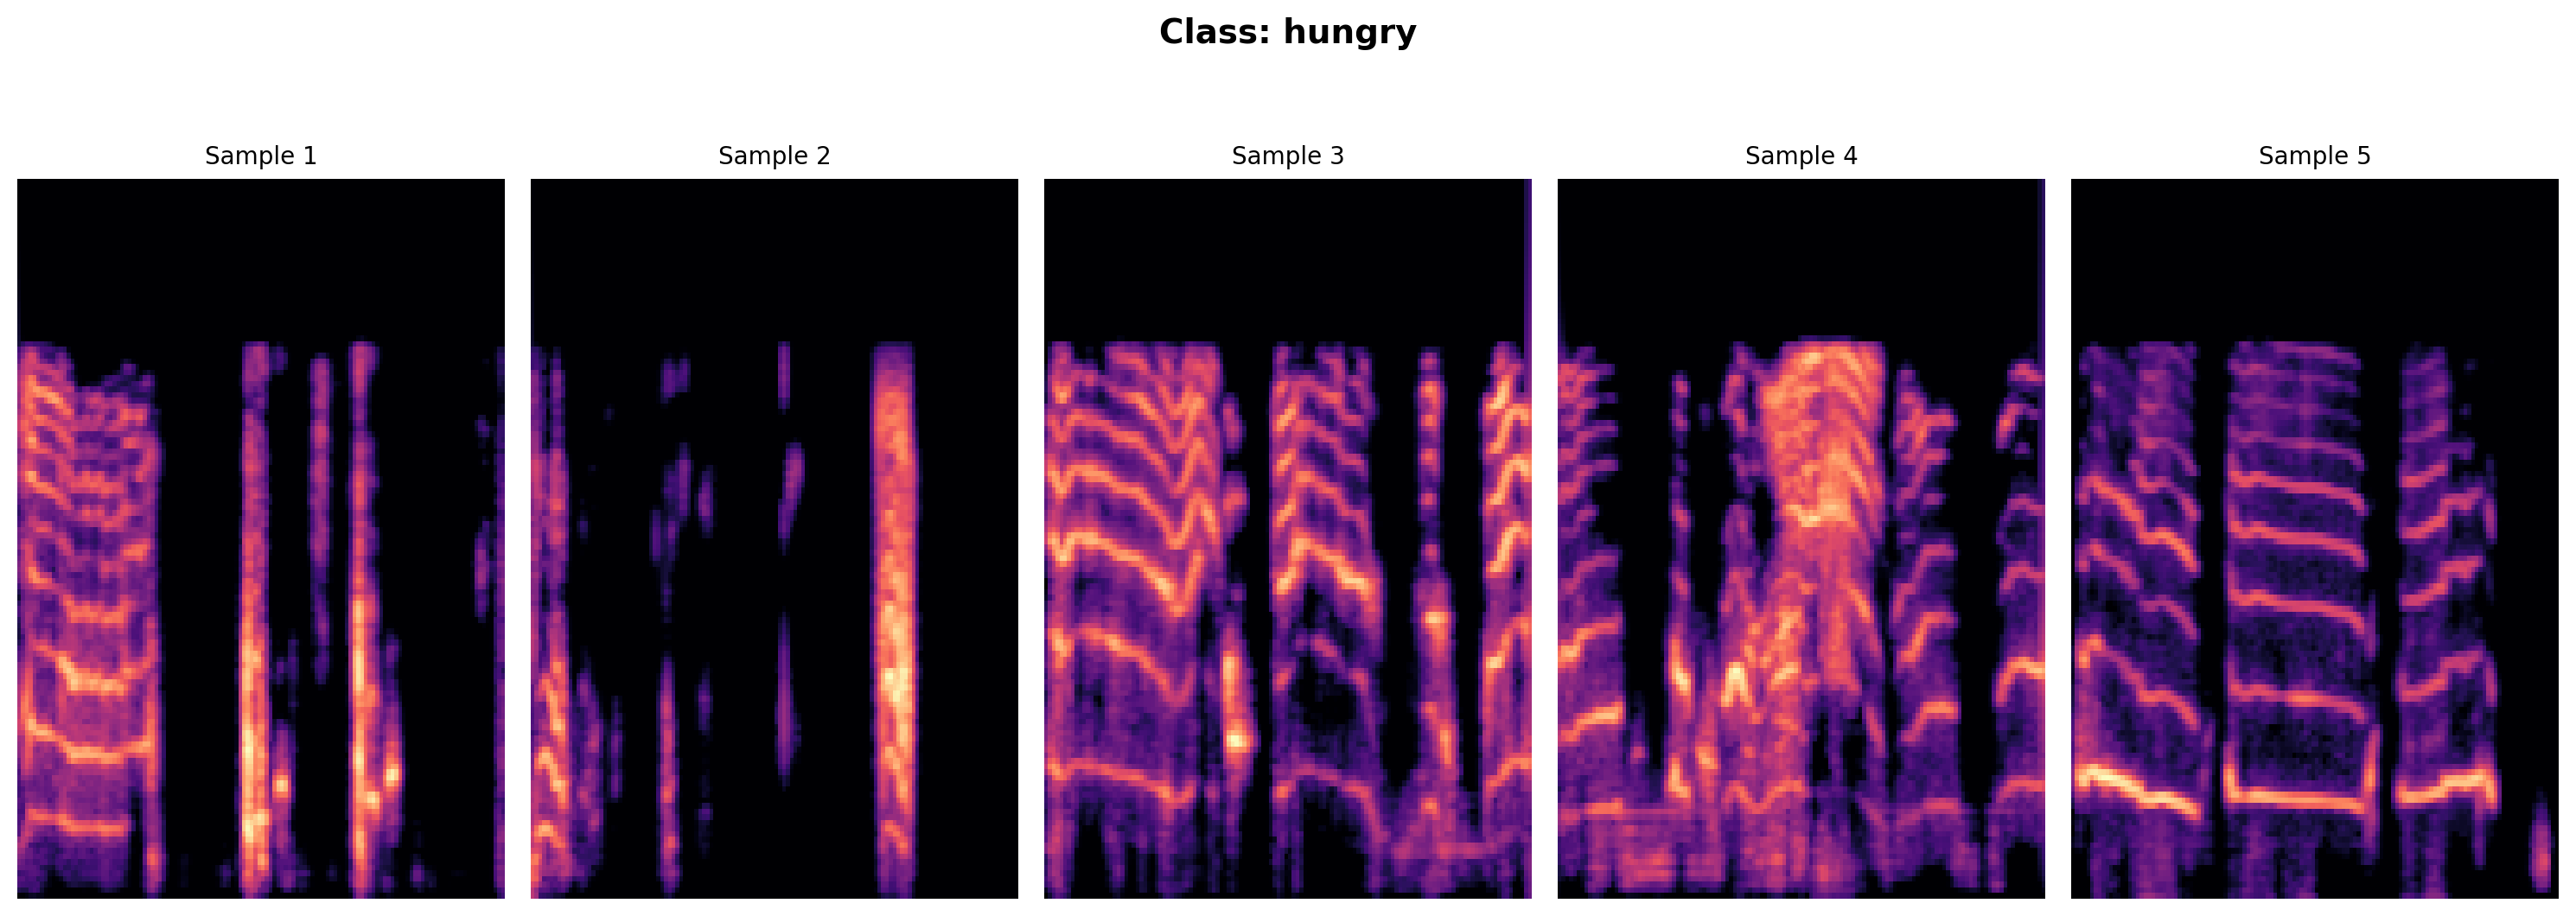

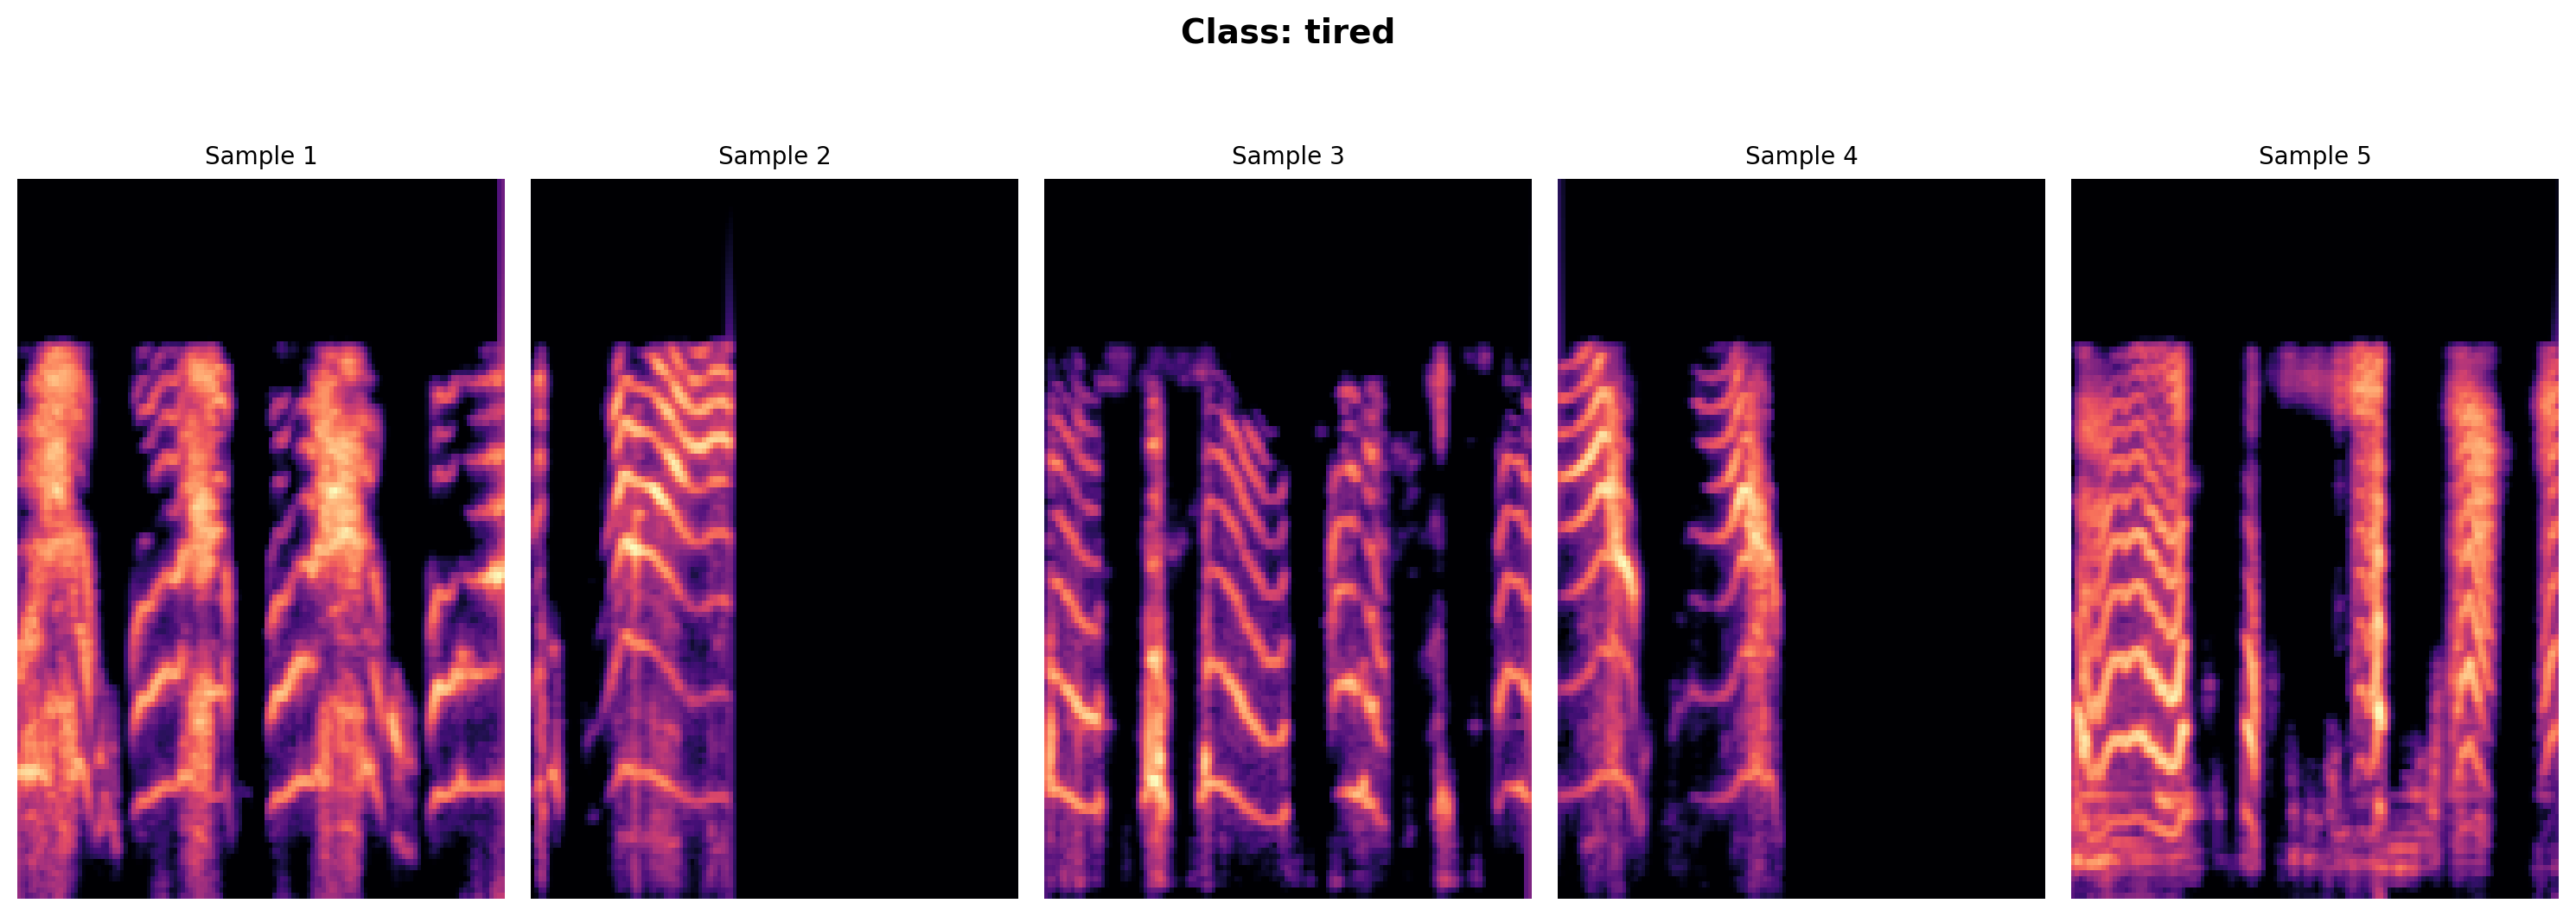

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Get class labels
class_indices = np.argmax(y_onehot, axis=1)
class_names = le.inverse_transform(np.unique(class_indices))

# Save directory
os.makedirs("class_spectrograms", exist_ok=True)

# Plot settings
n_samples = 5  # Number of spectrograms per class
dpi = 200      # High resolution
cmap_style = 'magma'

# Loop through each class
for class_label in class_names:
    indices = [i for i, y in enumerate(y_onehot) if le.inverse_transform([np.argmax(y)])[0] == class_label]

    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 3, 5), dpi=dpi)
    fig.suptitle(f"Class: {class_label}", fontsize=14, weight='bold', y=1.05)

    for i in range(n_samples):
        ax = axes[i]
        ax.imshow(X[indices[i]].squeeze(), origin='lower', aspect='auto', cmap=cmap_style)
        ax.set_title(f"Sample {i+1}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(f"class_spectrograms/{class_label}_spectrograms.png", bbox_inches='tight')
    plt.show()


## Class Balancing

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert one-hot to integer labels for resampling
y_int = np.argmax(y_onehot, axis=1)

# Flatten feature array for imblearn (2D only), so we reshape (samples, 128, 128, 1) → (samples, -1)
X_reshaped = X.reshape((X.shape[0], -1))

# Apply undersampling
rus = SMOTE()
X_resampled, y_resampled = rus.fit_resample(X_reshaped, y_int)

# Reshape back to 4D for CNN
X_resampled = X_resampled.reshape((-1, 128, 128, 1))

# One-hot encode the resampled labels
y_resampled_onehot = to_categorical(y_resampled)

# Now split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled_onehot, test_size=0.2, random_state=42)

print(f"✅ Resampled shape: X={X_resampled.shape}, y={y_resampled_onehot.shape}")


✅ Resampled shape: X=(1910, 128, 128, 1), y=(1910, 5)


In [16]:
from collections import Counter

Counter(y_resampled)

Counter({0: 382, 1: 382, 2: 382, 3: 382, 4: 382})

## Model Development

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, Flatten, 
                                     Dense, TimeDistributed, LSTM, Reshape)

input_shape = (128, 128, 1)  # Mel spectrogram shape

model = Sequential()

# CNN
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(len(np.unique(y)), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

C:\Users\mypc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       3,686,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,705,605 (14.14 MB)

 Trainable params: 3,705,605 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 36s 671ms/step - accuracy: 0.1718 - loss: 96.0173 - val_accuracy: 0.1911 - val_loss: 1.6096
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 45s 737ms/step - accuracy: 0.2850 - loss: 1.5720 - val_accuracy: 0.6702 - val_loss: 1.3898
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 30s 503ms/step - accuracy: 0.7164 - loss: 0.7695 - val_accuracy: 0.9031 - val_loss: 0.4948
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 491ms/step - accuracy: 0.8801 - loss: 0.3542 - val_accuracy: 0.9398 - val_loss: 0.2647
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 42s 501ms/step - accuracy: 0.9339 - loss: 0.1995 - val_accuracy: 0.9555 - val_loss: 0.2118
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 473ms/step - accuracy: 0.9615 - loss: 0.1100 - val_accuracy: 0.9817 - val_loss: 0.0541
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 24s 502ms/step - accuracy: 0.9479 - loss: 0.1353 - val_accuracy: 0.9686 - val_loss: 0.1125
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 25s 513ms/step - accuracy: 0.9762 - loss: 0.0796 - val_acc

In [19]:
preds = model.predict(X_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step


In [20]:
predictions = [np.argsort(i)[-1] for i in preds]
y_labels = [np.argsort(i)[-1] for i in y_test]

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        73
           1       1.00      1.00      1.00        72
           2       0.98      1.00      0.99        80
           3       1.00      0.92      0.96        84
           4       0.96      1.00      0.98        73

    accuracy                           0.98       382
   macro avg       0.98      0.98      0.98       382
weighted avg       0.98      0.98      0.98       382



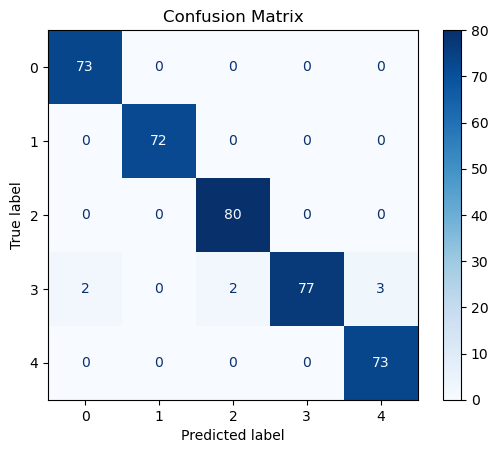

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_labels, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

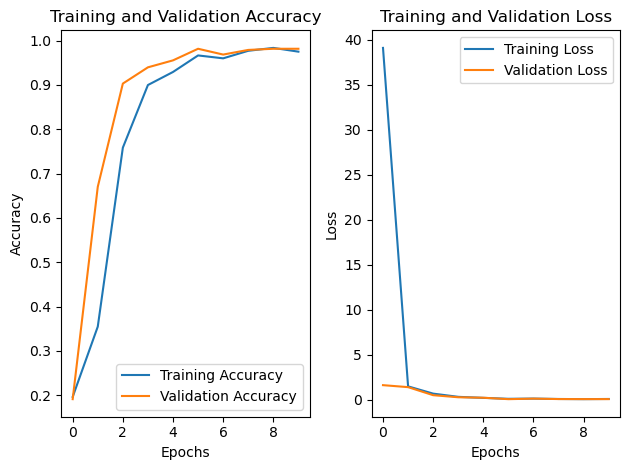

In [24]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Model Saving

In [27]:
model.save("cry_classification_mel_model.h5")


In [7]:
import pickle
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)
